# Phase 2 Review

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm 
import math
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(style="white")

pd.set_option('display.max_columns', 100)

### Check Your Data … Quickly
The first thing you want to do when you get a new dataset, is to quickly to verify the contents with the .head() method.

In [3]:
df = pd.read_csv('movie_metadata.csv')
print(df.shape)
df.head()

(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Question 1

A Hollywood executive wants to know how much an R-rated movie released after 2000 will earn. The data above is a sample of some of the movies with that rating during that timeframe, as well as other movies. How would you go about answering her question? Talk through it theoretically and then do it in code.

What is the 95% confidence interval for a post-2000 R-rated movie's box office gross?

In [5]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [3]:
# talk through your answer here
r = df[(df['title_year'] > 2000) & (df['content_rating'] == 'R')]
r.std()

num_critic_for_reviews       1.287568e+02
duration                     1.937591e+01
director_facebook_likes      2.565744e+03
actor_3_facebook_likes       1.435478e+03
actor_1_facebook_likes       1.235344e+04
gross                        3.908885e+07
num_voted_users              1.190435e+05
cast_total_facebook_likes    1.670983e+04
facenumber_in_poster         1.989097e+00
num_user_for_reviews         3.385624e+02
budget                       3.715698e+08
title_year                   4.368046e+00
actor_2_facebook_likes       5.269465e+03
imdb_score                   1.028918e+00
aspect_ratio                 7.069813e-01
movie_facebook_likes         2.199869e+04
dtype: float64

In [6]:
df1 = df.dropna(subset = ['gross'])

In [9]:
df1.isna().sum()

color                          2
director_name                  3
num_critic_for_reviews         3
duration                       2
director_facebook_likes        3
actor_3_facebook_likes        13
actor_2_name                   6
actor_1_facebook_likes         4
gross                          0
genres                         0
actor_1_name                   4
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  13
facenumber_in_poster           7
plot_keywords                 40
movie_imdb_link                0
num_user_for_reviews           1
language                       3
country                        0
content_rating                64
budget                       268
title_year                     3
actor_2_facebook_likes         6
imdb_score                     0
aspect_ratio                 105
movie_facebook_likes           0
dtype: int64

In [10]:
# do it in code here
gross_value = df1['gross']
gross_value.describe()

count    4.159000e+03
mean     4.846841e+07
std      6.845299e+07
min      1.620000e+02
25%      5.340988e+06
50%      2.551750e+07
75%      6.230944e+07
max      7.605058e+08
Name: gross, dtype: float64

In [11]:
# 95% confidence interval
def conf_interval(sample, alpha):
    """
    Function input: population, sample
    Function output: z-critical, Margin of Error, Confidence Interval
    """
    sample_size = len(sample)
    x_hat = sample.mean()
    # Calculate the z-critical value using stats.norm.ppf()
    # Note that we use stats.norm.pff(q = 0.0975) to get the desired z-critical value
    # Instead of q = 0.95 because the distribution has two tails
    # z = stats.norm.ppf(q = 0.975)
    t = stats.t.ppf(alpha, df=len(sample))
    # Calculate the population std from data
    stdev = sample.std()
    # Calculate the margin of error using formula given above
    moe = t * (stdev/math.sqrt(sample_size))
    conf = (x_hat - moe, x_hat + moe)
    return ("We are 95% confident that are our mean {} falls between {} and {}".format(x_hat, x_hat - moe, x_hat + moe)) 

In [12]:
conf_interval(gross_value, 0.0025)

'We are 95% confident that are our mean 48468407.52680933 falls between 51449513.80775386 and 45487301.24586479'

## Question 2a

Your ability to answer the first question has the executive excited and now she has many other questions about the types of movies being made and the differences in those movies budgets and gross amounts.

Read through the questions below and **determine what type of statistical test you should use** for each question and **write down the null and alternative hypothesis for those tests**.

- Is there a relationship between the number of Facebook likes for a cast and the box office gross of the movie?
- Do foreign films perform differently at the box office than non-foreign films?
- Of all movies created are 40% rated R?
- Is there a relationship between the language of a film and the content rating (G, PG, PG-13, R) of that film?
- Is there a relationship between the content rating of a film and its budget? 

In [ ]:
#2a1

# 𝐻0:𝛽1=0 
# 𝐻𝑎:𝛽1≠0 
# H0 There is NO relationship between Facebook likes and box office gross of the movie
# HA There is a relationship between Facebook likes and the box office gross of the movie
# TEST: Simple linear regression (no means, correlation)


In [ ]:
#2a2
# H0: x1 = x2 There is NO difference between foreign films then non-foreign films
# HA: x1 != x2 There is a difference between foreign films and non-foreign films 
# TEST: Difference between two means, two_sided t test

In [ ]:
#2a3
#H0 p = 0.4  All movies created are 40% rated R
#HA p != 0.4  All movies created, 40% are not rated R
# TEST: One sample proportions test ->  z-test 

In [ ]:
#2a4
# 𝐻0: distributions are equal 
# 𝐻𝑎: distributions are not equal 
# Chi squared (two catergorical features)

In [ ]:
#2a5
# 𝐻0: mu_R = mu_PG13 = mu_PG = mu_G 
# 𝐻𝑎: not all equal 
# ANOVA (two quantative) 

## Question 2b

Calculate the answer for the second question:

- Do foreign films perform differently at the box office than non-foreign films?

In [18]:
# your answer here
df_dom = df1[df1.country == 'USA']
df_foreign = df1[df1.country != 'USA']


In [19]:
def sample_variance(sample):
    sample_mean = np.mean(sample)
    return np.sum((sample - sample_mean) **2)/ (len(sample) -1)

In [20]:
def pooled_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var_1, var_2 = sample_variance(sample1), sample_variance(sample2)
    return ((n_1-1) * var_1 + (n_2-1)* var_2)/((n_1 + n_2)-2)

In [21]:
def twosample_tstatistic(expr, ctrl):
    exp_mean, ctrl_mean = np.mean(expr), np.mean(ctrl)
    pool_var = pooled_variance(expr, ctrl)
    n_e, n_c = len(expr), len(ctrl)
    num = exp_mean - ctrl_mean
    denom = np.sqrt(pool_var * ((1/n_e)+(1/n_c)))
    z_value =  num / denom
    return z_value
    

In [22]:
twosample_tstatistic(df_dom, df_foreign)['gross']

12.098302287742106

The z value for our two sample t test will have us reject the null hypothesis 

In [109]:
def diff_two_means(df1, df2, q):
    n1 = len(df1)
    n2 = len(df2)
    
    x_1 = df1.mean()
    x_2 = df2.mean()
    
    s1 = df1.std()
    s2 = df2.std()
    
    df1_2 = (n1+n2)-2
    # This is for t -value
    # If given population standard deveiation use 
    # z_critical = stats.norm.ppf(q)
    t_crit = stats.t.ppf(q, df=df1_2)
    
     # critical value 
    numer = (x_1 - x_2) - 0
    denum = math.sqrt((s1**2/n1)+(s2**2/n2))
    delta_mu = numer/denum
    
    results = stats.ttest_ind(df1, df2, axis=0, nan_policy = 'omit', equal_var=False)
    p = 1-stats.t.cdf(delta_mu, df=df1_2)
    
    print(results)
    print(t_crit)
    print(delta_mu)
    print(p)
    
    if delta_mu > t_crit or delta_mu < - t_crit :
        print ("We reject null hypothesis. Results are statistically significant with t-value =", 
        round(results[0], 2), "critical t-value =", t_crit, "and p-value =", np.round((results[1]), 10))
    else:
        print ("We fail to reject the null hypothesis. Results are statistically insignifcant with t-value ==", 
        round(results[0], 2), ", critical t-value =", t_crit, "and p-value =", np.round((results[1]), 10))
diff_two_means(df_dom['gross'], df_foreign['gross'], .975)

Ttest_indResult(statistic=14.911721173786228, pvalue=5.784651659798822e-48)
1.960534816956006
14.911721173786235
0.0
We reject null hypothesis. Results are statistically significant with t-value = 14.91 critical t-value = 1.960534816956006 and p-value = 0.0


16.811429312545187

        We reject the null Hypotesys because based one statistical test two groups sample means difference 
        is = 16.81, which gets in rejection area defined by critical values 1.96 and -1.96.
        


## Question 3

Now that you have answered all of those questions, the executive wants you to create a model that predicts the money a movie will make if it is released next year in the US. She wants to use this to evaluate different scripts and then decide which one has the largest revenue potential. 

Below is a list of potential features you could use in the model. Create a new frame containing only those variables.

Would you use all of these features in the model?

Identify which features you might drop and why.

*Remember you want to be able to use this model to predict the box office gross of a film **before** anyone has seen it.*

- **budget**: The amount of money spent to make the movie
- **title_year**: The year the movie first came out in the box office
- **years_old**: How long has it been since the movie was released
- **genres**: Each movie is assigned one genre category like action, horror, comedy
- **imdb_score**: This rating is taken from imdb, and is the average rating given to the movie by the audience
- **actor_1_facebook_likes**: The number of likes that the most popular actor in the movie has
- **cast_total_facebook_likes**: The sum of likes for the three most popular actors in the movie
- **language**: the original spoken language of the film


In [42]:
df.keys()

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'years_old'],
      dtype='object')

In [86]:

# Compute the correlation matrix
corr = df.corr()
corr

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,years_old,total_cast_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176,-0.275707,0.251664
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605,0.135038,0.116135
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048,0.063820,0.115637
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844,-0.096137,0.434627
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348,-0.086873,0.963046
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082,-0.030886,0.223904
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924,-0.007397,0.252457
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786,-0.109971,0.997441
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918,-0.061504,0.086515
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594,0.003147,0.195235


In [119]:
df[df.columns[:]].corr()['gross'][:]

num_critic_for_reviews       0.480420
duration                     0.254586
director_facebook_likes      0.144945
actor_3_facebook_likes       0.307898
actor_1_facebook_likes       0.154270
gross                        1.000000
num_voted_users              0.637167
cast_total_facebook_likes    0.247184
facenumber_in_poster        -0.028106
num_user_for_reviews         0.559804
budget                       0.102179
title_year                   0.030886
actor_2_facebook_likes       0.262614
imdb_score                   0.199432
aspect_ratio                 0.068788
movie_facebook_likes         0.377961
years_old                   -0.030886
total_cast_facebook_likes    0.223694
Name: gross, dtype: float64

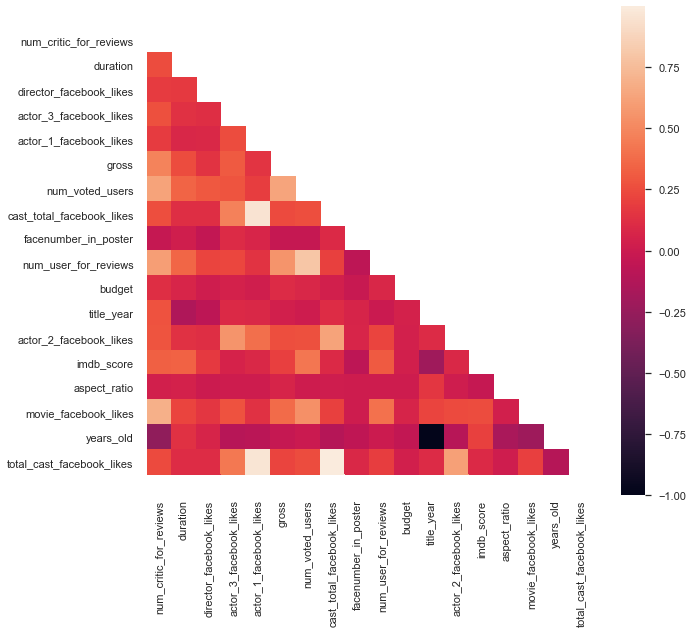

In [104]:
# Set up  matplotlib figure (might have to play around with the 
# figsize if your labels aren't so legible and you don't want
# to mess with the labels using matplotlib)
f, ax = plt.subplots(figsize=(10, 9))

# Create an upper triangular matrix to use to get rid of duplicate/
# useless values
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr(), mask=mask, square=True)
    
# fix for mpl bug that cuts off top/bottom of seaborn viz
# credit: https://github.com/mwaskom/seaborn/issues/1773 SalMac86's post
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [117]:
# your answer here
from statsmodels.formula.api import ols

slr_model = ols(formula='gross~budget+language+genres', data=df).fit()

In [118]:
slr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     3.104
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          5.47e-109
Time:                        14:28:53   Log-Likelihood:                -74600.
No. Observations:                3888   AIC:                         1.508e+05
Df Residuals:                    3093   BIC:                         1.558e+05
Df Model:                         794                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                   1.002e+08   6.54e+07      1.533      0.125    -2.8e+07    2.28e+08
language[T.Arabic]                                                         -6.708e+07   8.43e+07     -0.796      0.426   -2.32e+08    9.82e+07
language[T.Aramaic]                                                        -5.654e+07   8.43e+07     -0.671      0.502   -2.22e+08    1.09e+08
language[T.Bosnian]                                                        -8.338e+07   8.75e+07     -0.953      0.341   -2.55e+08    8.81e+07
language[T.Cantonese]                                                      -8.311e+07   6.55e+07     -1.269      0.205   -2.12e+08    4.53e+07
language[T.Chinese]                                                           96.2041     75.644      1.272      0.204     -52.114     244.522
language[T.Czech]                                                          -5.191e+07   4.38e+07     -1.184      0.236   -1.38e+08     3.4e+07
language[T.Danish]                                                         -6.102e+07   7.02e+07     -0.870      0.385   -1.99e+08    7.66e+07
language[T.Dari]                                                           -4.758e+07   7.35e+07     -0.647      0.517   -1.92e+08    9.65e+07
language[T.Dutch]                                                          -5.206e+07   7.23e+07     -0.720      0.472   -1.94e+08    8.98e+07
language[T.Dzongkha]                                                       -5.026e+07    8.7e+07     -0.578      0.563   -2.21e+08     1.2e+08
language[T.English]                                                        -3.473e+07   6.06e+07     -0.573      0.567   -1.54e+08    8.41e+07
language[T.Filipino]                                                       -1.156e+08   8.71e+07     -1.327      0.185   -2.86e+08    5.53e+07
language[T.French]                                                         -5.999e+07   6.18e+07     -0.971      0.331   -1.81e+08    6.11e+07
language[T.German]                                                         -6.004e+07   6.33e+07     -0.949      0.343   -1.84e+08     6.4e+07
language[T.Greek]                                                            -27.5096     39.830     -0.691      0.490    -105.606      50.587
language[T.Hebrew]                                                         -5.724e+07   7.72e+07     -0.742      0.458   -2.09e+08    9.41e+07
language[T.Hindi]                                                          -7.379e+07   6.36e+07     -1.160      0.246   -1.98e+08    5.09e+07
language[T.Hungarian]                                                      -2.07

## Question 4a

Create the following variables:

- `years_old`: The number of years since the film was released.
- Dummy categories for each of the following ratings:
    - `G`
    - `PG`
    - `R`
    
Once you have those variables, create a summary output for the following OLS model:

`gross~cast_total_facebook_likes+budget+years_old+G+PG+R`

In [105]:
# your answer here
# df['years_old'] = 2021 - df['title_year'] 
df['years_old'] = df['title_year'].map(lambda x: 2021-x)

In [106]:
df = df.dropna(subset = ['years_old'])

In [111]:
G = df[df['content_rating'] == 'G']
PG = df[df['content_rating'] == 'PG']
R = df[df['content_rating'] == 'R']

In [113]:
# your answer here
from statsmodels.formula.api import ols

slr_model = ols(formula='gross~cast_total_facebook_likes+budget+years_old', data=df).fit()

In [114]:
slr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     93.46
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           2.12e-58
Time:                        10:05:35   Log-Likelihood:                -75661.
No. Observations:                3891   AIC:                         1.513e+05
Df Residuals:                    3887   BIC:                         1.514e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  4.163e+07    2.4e+06     17.311      0.000    3.69e+07    4.63e+07
cast_total_facebook_likes   872.1432     57.570     15.149      0.000     759.273     985.014
budget                        0.0296      0.005      6.087      0.000       0.020       0.039
years_old                 -9.686e+04   1.09e+05     -0.889      0.374   -3.11e+05    1.17e+05
==============================================================================
Omnibus:                     2391.301   Durbin-Watson:                   0.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38686.513
Skew:                           2.644   Prob(JB):                         0.00
Kurtosis:                      17.514   Cond. No.                     5.05e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Question 4b

Below is the summary output you should have gotten above. Identify any key takeaways from it.
- How ‘good’ is this model?
- Which features help to explain the variance in the target variable? 
    - Which do not? 


<img src="ols_summary.png" style="withd:300px;">

In [ ]:
# your answer here
#  R - squared value: 0.079
# Adj. R -squared value: 0.075
# Poor model because there is littel variation within the model, 
# seeing that our data points spread out more
# All the features with the exception G rating help us explain the variance
# in the target variable, based on our p-value
# G rated value is the only value we can see from here that plays no effect on the
# gross of the film. 


## Question 5

**Bayes Theorem**

An advertising executive is studying television viewing habits of married men and women during prime time hours. Based on the past viewing records he has determined that during prime time wives are watching television 60% of the time. It has also been determined that when the wife is watching television, 40% of the time the husband is also watching. When the wife is not watching the television, 30% of the time the husband is watching the television. Find the probability that if the husband is watching the television, the wife is also watching the television.

In [13]:
# your answer here
p_a = 0.60
p_b = (0.60 * 0.40) + (0.40 * 0.30)
p_b_given_a = 0.40

p_a_given_b = (p_b_given_a * p_a) / (p_b)

In [14]:
print("The number of woman watching tv given husbands are watching is {}% of the time.".format(round(p_a_given_b, 2) * 100)) 

The number of woman watching tv given husbands are watching is 67.0% of the time.


## Question 6

Explain what a Type I error is and how it relates to the significance level when doing a statistical test. 

In [ ]:
# your answer here
# Type I error is a False Postive, the probability of rejecting the null hypothesis
# when the null hypothesis is actually true or a false positive. 
# You are willing to accept that their is 5% chance that we fail to reject
# null hypothesis, when we reject the null hypoethesis 

In [ ]:
# Another type of error is beta ( 𝛽 ), which is the probability 
# that you fail to reject the null hypothesis when it is actually false. 
# Type II errors are also referred to as False Negatives